In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

from hmmlearn.hmm import GaussianHMM

from warnings import filterwarnings 
filterwarnings('ignore')

ЧАСТЬ 1 - Война и мир

In [2]:
with open('tom_all.txt', 'r', encoding='utf-8') as f:
    text = f.read().lower()
text = re.sub('[^а-я ]','', text)

Построим матрицу переходных вероятностей.

In [3]:
RUSSIAN = 'абвгдежзийклмнопрстуфхцчшщъыьэюя '
POS = {l: i for i, l in enumerate(RUSSIAN)}
probabilities = np.zeros((len(RUSSIAN), len(RUSSIAN)))
for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]] += 1
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

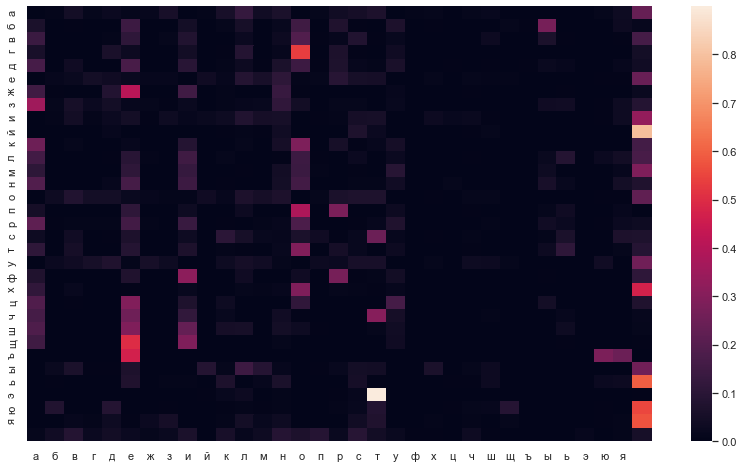

In [4]:
df = pd.DataFrame(probabilities, index=(c for c in RUSSIAN), columns=(c for c in RUSSIAN))
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

Посчитаем вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р

In [5]:
start = POS['п']
end = POS['р']
prior = 1. / len(RUSSIAN)
for c in RUSSIAN:
    for d in RUSSIAN:
        proba = prior * probabilities[start, POS[c]] * probabilities[POS[c], POS[d]] * probabilities[POS[d], end]
        if proba > 0:
            print(''.join(['п', c, d, 'р']), proba)

паар 1.2861294615670748e-08
пабр 1.0463297912935638e-06
павр 1.1943064367697012e-06
пагр 1.323745150648832e-06
падр 3.0312598678340207e-06
паер 2.0094151071580564e-06
пажр 7.533524086065053e-09
пазр 1.2462329996322449e-06
паир 2.6249966485849846e-08
пайр 2.8436032855227694e-08
пакр 4.987544545420132e-06
палр 3.4630088933366065e-09
памр 1.126218932098043e-07
панр 1.1965181886103109e-07
паор 4.471186499829828e-08
папр 5.796884642842818e-06
парр 2.9572571724020078e-08
паср 5.196131991570188e-07
патр 5.699536966609488e-06
паур 7.133408841358231e-08
пафр 3.273120430827629e-06
пахр 2.5147823049456587e-07
пачр 2.7309274088930096e-08
пашр 5.425580532227317e-09
пащр 4.68289641627989e-09
паэр 3.5057943460701446e-10
паюр 1.6636372746661016e-07
паяр 1.5390975580435555e-07
па р 8.961162246215709e-06
пвар 2.891435354905608e-09
пвбр 1.642710111867701e-11
пввр 8.407285819330329e-12
пвгр 3.42172326649639e-11
пвдр 2.766956414021389e-10
пвер 5.213208176710744e-09
пвжр 4.027858049579562e-15
пвзр 8.7430971

Сгенерируем слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов

In [10]:
def func1(sq, length):
    for i in range(length-1):
        index = POS[sq[i]]
        next_char = np.random.choice(list(RUSSIAN), p=probabilities[index])
        sq.append(next_char)
    print (''.join(sq))

for _ in range(5):
    func1(['б'], 8)    
    


ботозала
быйшкаре
боспо ит
бк оилам
беровсты


ЧАСТЬ 2 - HMM

In [11]:
series = pd.read_csv("weekly-closings-of-the-dowjones-.csv")["Close"]
values = series.values.reshape(-1,1)

In [12]:
for n in range(1, 16):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=500)
    model.fit(values)
    print (n, model.score(values))

1 -894.2620483582104
2 -820.6341453620569
3 -786.8375332667712
4 -752.0201472668953
5 -737.1181111930927
6 -729.5671112589433
7 -713.7233991716995
8 -702.105775450821
9 -690.9838068209646
10 -691.2725471471313


Fitting a model with 167 free scalar parameters with only 162 data points will result in a degenerate solution.
Fitting a model with 194 free scalar parameters with only 162 data points will result in a degenerate solution.


11 -679.0467248974986
12 -675.2607639286704


Fitting a model with 223 free scalar parameters with only 162 data points will result in a degenerate solution.
Fitting a model with 254 free scalar parameters with only 162 data points will result in a degenerate solution.


13 -656.8140368379728
14 -650.5398071660742
15 -639.1040980783989


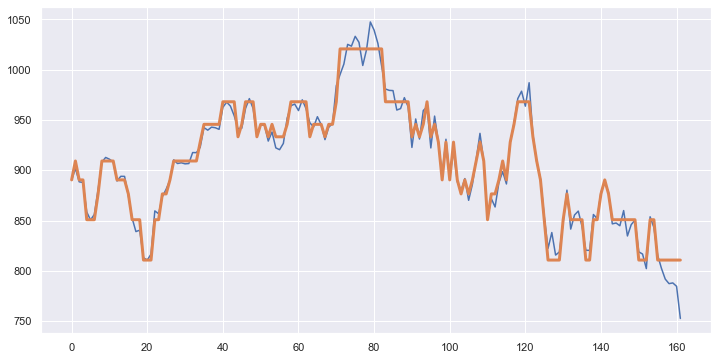

In [13]:
model_10 = GaussianHMM(n_components=10,
                        covariance_type="diag",
                        n_iter=1000)
model_10.fit(values)
labels = model_10.predict(values)
means = np.zeros_like(values)
for i in range(model_10.n_components):
    means[labels == i] = model_10.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)
plt.show()

In [14]:
model_10.score(values)

-691.7472727877339

Fitting a model with 254 free scalar parameters with only 162 data points will result in a degenerate solution.


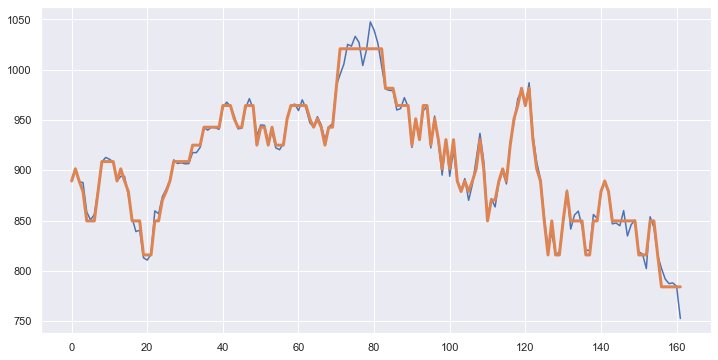

In [15]:
model_15 = GaussianHMM(n_components=15,
                        covariance_type="diag",
                        n_iter=1000)
model_15.fit(values)
labels = model_15.predict(values)
means = np.zeros_like(values)
for i in range(model_15.n_components):
    means[labels == i] = model_15.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)
plt.show()

In [16]:
model_15.score(values)

-639.1047047483568

Fitting a model with 674 free scalar parameters with only 162 data points will result in a degenerate solution.


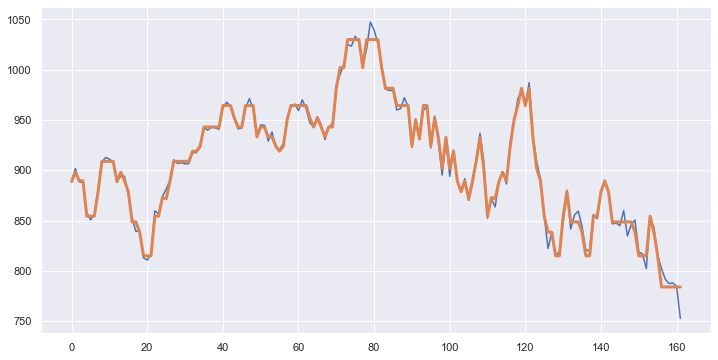

In [17]:
model_25 = GaussianHMM(n_components=25,
                        covariance_type="diag",
                        n_iter=1000)
model_25.fit(values)
labels = model_25.predict(values)
means = np.zeros_like(values)
for i in range(model_25.n_components):
    means[labels == i] = model_25.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)
plt.show()

In [18]:
model_25.score(values)

-579.106823133932